# Clustering en Python

Como veiamos en la clase anterior clustering es un método de aprendizaje no-supervisado que nos permite crear agrupar observaciones en clusters para crear o encontrar categorías latentes en la data.

Hay varios algoritmos de hacer clustering, las más popular es KMeans Clustering que arma $k$ clusters donde $k$ es un paramétro modificable por el investigador/usuario.

Otros algoritmos para resolver el problema de clustering son:
- Hierarchical Clustering (Clustering Jerárquico)
- Gaussian Mixtures (Mezclas Gausianas)
- DBSCAN (Density-Based Spectral Clustering Analysis)

Estos los cubriremos brevemente en esta sección.

## K-Means Clustering

El algoritmo de clustering es el siguiente: 

``escoger al azar k observaciones como los centroides originales``

``mientras sea cierto:``

``crear k clusters asignando los puntos a los centroides más cercanos``

``calcule k nuevos centroides tomado el promedio de los centroides en cada cluster``

``si los centroides no cambian:``

``salir del bucle ``

In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
 

Por ser un dataset pequeño y facil de entender vamos a usar `iris` para mostrar los códigos necesarios para resolver el problema de clustering usando `python`.

In [2]:
iris=datasets.load_iris() 
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Vamos a transformar los nombres del dataset y a crear un dataframe con las columnas de variables independientes. 

In [3]:
names=[name[0:-5] for name in iris['feature_names']]

df_iris=pd.DataFrame(iris['data'], columns= names)

df_iris.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Ya tenemos cargada la data. Ahora grafiquemosla para tener una idea visual de como podríamos agrupar las observaciones.

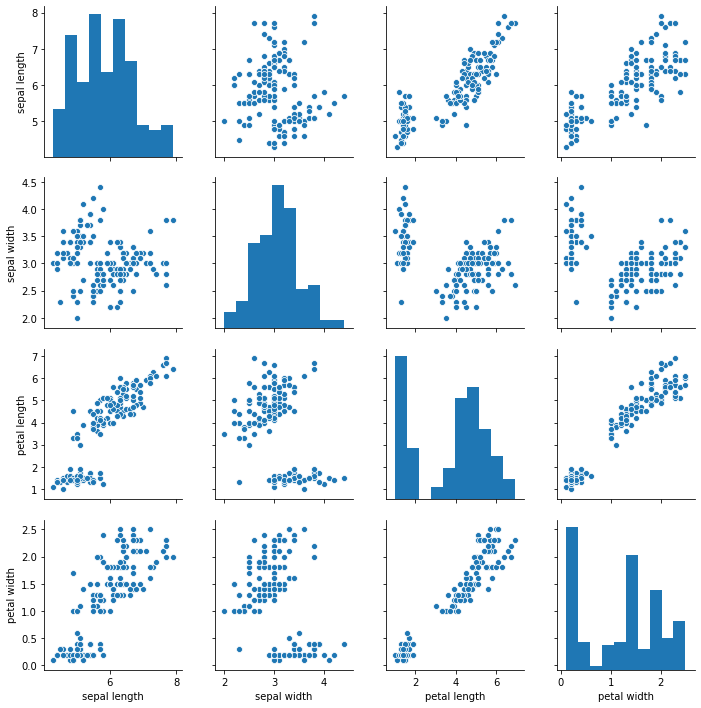

In [4]:
sns.pairplot(df_iris)

En la clase anterior veiamos que para poder clusterizar era necesario calcular distancias entre los centroides y las observaciones. Para hacer esto más facilmente podemos representar la informacion en términos de matrices y vectores con numpy.

In [5]:
X=np.array(df_iris)


La matriz $X$ contiene los datos de las observaciones en las filas y datos de varibables en las columnas:
 

|  Obs | $\rightarrow $| ..|...|
|:----:|:--:|---|---|
| Vars |...    | ..  |....|   
|  $\downarrow $  |  ...  | ...  |...|
|   .  | ...      |  ...  | ...|     



In [6]:
# Las filas son observaciones
print(X[0])

# Las columas son variables

X[:,0]


[5.1 3.5 1.4 0.2]


array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

Podemos calcular la distancia entre dos observaciones, suponiendo que una de ellas sea un centroide y la otra una observacion del cluster.

In [7]:
print(X[0:2])


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]]


Simplemente tomamos la diferencia entre la primera fila y la segunda, la elevamos al cuadrado y luego hacemos la suma de los errores cuadrados

In [8]:
diff = np.square(X[0]-X[1])

print(diff)

np.sqrt(diff.sum())



[0.04 0.25 0.   0.  ]


0.5385164807134502

También podemos calcular el promedio de un grupo de observaciones. Por ejemplo, podemos suponer que las primeras 10 observaciones son un cluster y calcular su centriode

In [9]:
print(X[0:10])
X.mean(axis=0)


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


array([5.84333333, 3.05733333, 3.758     , 1.19933333])

Con los metodos vistos y algunos más podriamos implementar nuestra propia version del algorítmo, pero veremos es más importante que interpretemos los resultados y que entendamos como variar los parámetros para obtener los mejores resultados.

Imaginemos que no tenemos una idea clara de cuantos clusters debemos usar para segmentar los datos. Debemos entonces empezar por encontrar el número adecuado de clusters. 

In [10]:
n_clusters=30
cost=[]


En la lista costo vamos a calcular la función costo dada por: 

$$ J = \sum_{n=1}^{N} \sum_{k=1}^{K} r_{nk}|| x_n − µ_k||^2 $$

donde $\mu_k$ es el centroide número $k$ y $x_n$ es una observación. Las lineas dobles representa la distancia entre las observaciones y el centroide del cluster al que estaban asignado. 

$r_{kn}$ es una función indicadora que toma el valor 1 si el punto está en el cluster y 0 de lo contrario.

J nos dice la distancia todoal en todos los centroides

In [11]:
for i in range(1,n_clusters):
    kmean= KMeans(i, verbose=0)
    kmean.fit(X)
    cost.append(kmean.inertia_)  
    

El resultado es:

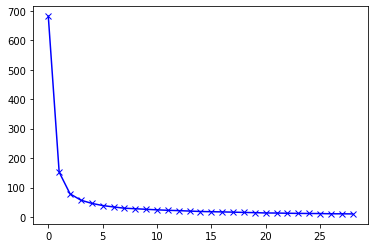

In [12]:
plt.plot(cost, 'bx-')


Veamos los resultados de correr el algorítmo con solamente 2 clusters:

In [62]:
kmean= KMeans(2)
kmean.fit(X)
labels=kmean.labels_
labels


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Podemos adjuntar la columna cluster en la que asignamos cada obervación al cluster que el algoritmo devolvió

In [63]:
clusters=pd.concat([df_iris, pd.DataFrame({'cluster2':labels})], axis=1)
clusters.head()


,sepal length,sepal width,petal length,petal width,cluster2
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


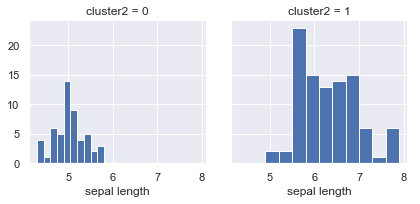

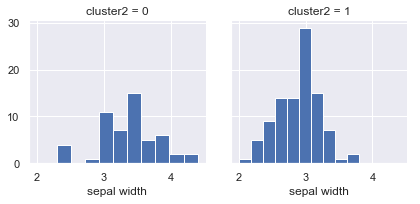

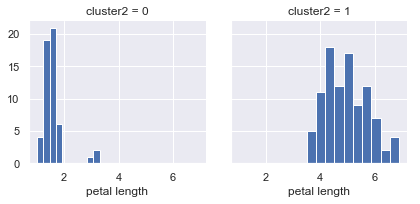

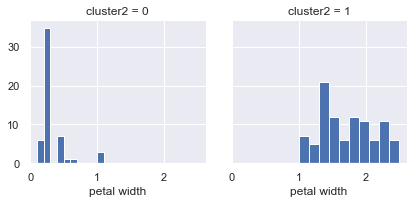

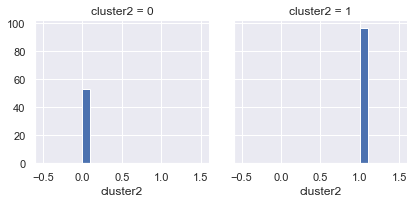

In [64]:
for c in clusters.columns.tolist():
    grid= sns.FacetGrid(clusters, col='cluster2')
    grid.map(plt.hist, c, color='b')
    

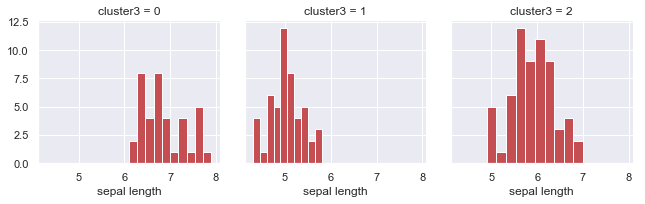

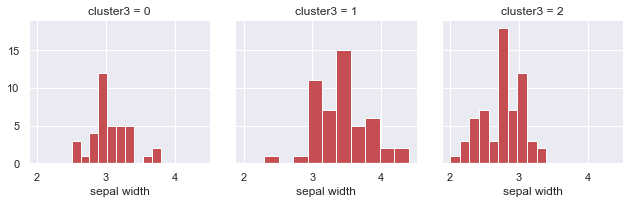

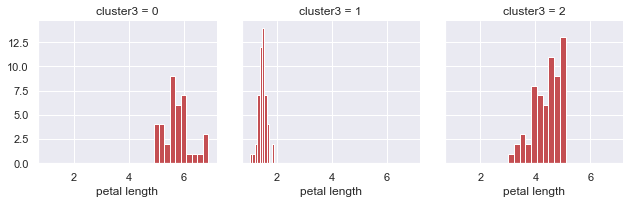

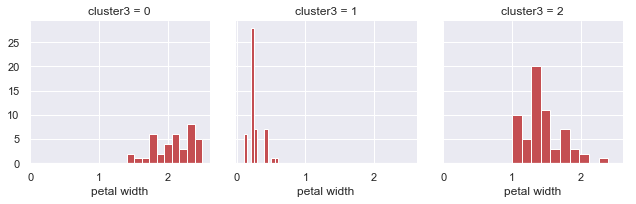

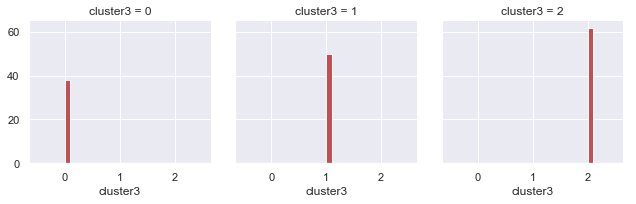

In [32]:
kmean= KMeans(3)
kmean.fit(X)
labels=kmean.labels_

clusters=pd.concat([df_iris, pd.DataFrame({'cluster3':labels})], axis=1)
clusters.head()

for c in clusters.columns.tolist():
    grid= sns.FacetGrid(clusters, col='cluster3')
    grid.map(plt.hist, c, color='r')
    

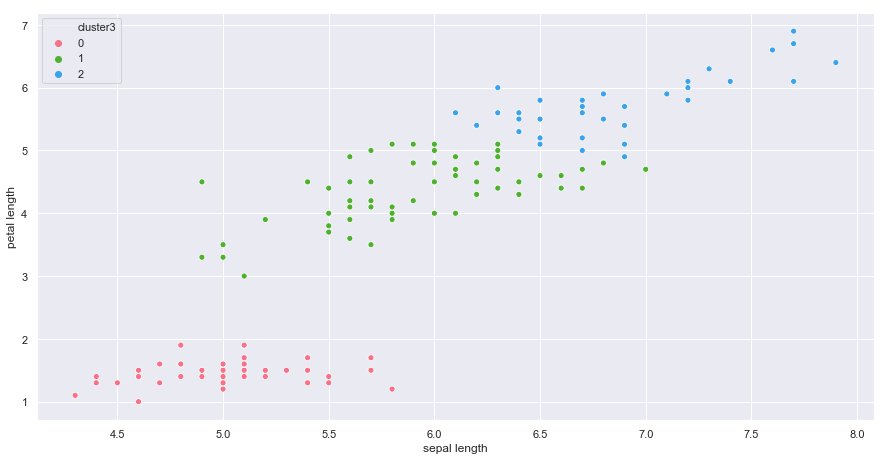

In [19]:
plt.figure(figsize=(15, 7.5))
sns.set()
sns.scatterplot(x = clusters['sepal length'], y=clusters['petal length'] ,hue='cluster3'
                 ,  data=clusters, palette = sns.color_palette("husl", 3))
plt.show()

In [66]:
df_iris = clusters.join(pd.DataFrame(iris['target'], columns=['target']))

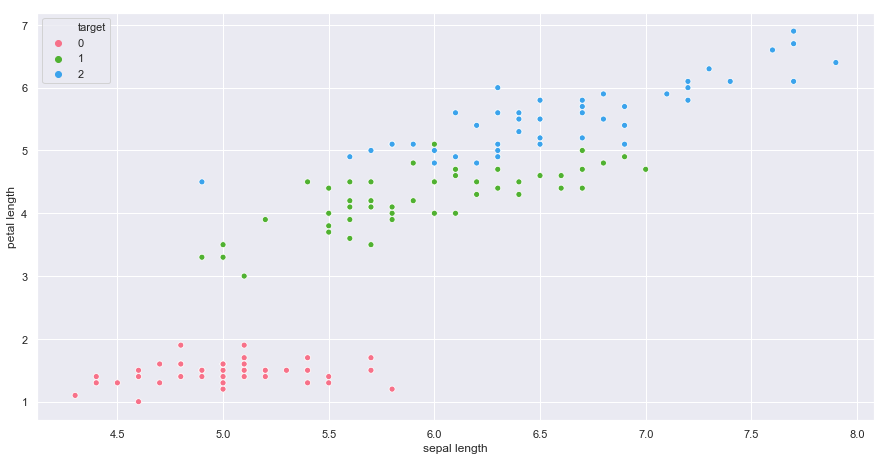

In [68]:
plt.figure(figsize=(15, 7.5))
sns.scatterplot(x = df_iris['sepal length'], y=df_iris['petal length'] ,hue='target'
                 ,  data=df_iris, palette = sns.color_palette("husl", 3))
plt.show()

Lo mejor de hacer este problema es que podemos predecir que tipo de plantas serían las observaciones nuevas. 

In [79]:
#cluster_pred = kmean.predict(np.array([5.5, 1.3, 4.2, 1.0]))
print("El cluster para esta planta es : "+ str(cluster_pred[0]))



np.array([5.5, 1.3, 4.2, 1.0] ).reshape(-1,1)


El cluster para esta planta es : 1


array([[5.5],
       [1.3],
       [4.2],
       [1. ]])

Proximos pasos:
- Aplicaciones a tarjetas de crédito.
- Control
- Probabilidades y empezar con Aprendizaje Supervisado

In [38]:
dir(kmean)

kmean.inertia_

kmean.labels_

kmean.n_iter_

KMeans?